In [25]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import re
import oommfpy as op
import oommfpy.tools as ot

In [26]:
omfs = glob.glob('sims/oommf/mixed_phases_FeGe_Lx1000nm_Ly100nm_Lz1000nm_ROT/mixed_phases/*.omf')
omfs = sorted(omfs, key=lambda f: int(re.search(r'(?<=m_Bz)\d\d\d', f).group(0)))

In [27]:
omfs

['sims/oommf/mixed_phases_FeGe_Lx1000nm_Ly100nm_Lz1000nm_ROT/mixed_phases/m_Bz000mT-Oxs_MinDriver-Magnetization-00-0026003.omf',
 'sims/oommf/mixed_phases_FeGe_Lx1000nm_Ly100nm_Lz1000nm_ROT/mixed_phases/m_Bz100mT-Oxs_MinDriver-Magnetization-00-0051968.omf',
 'sims/oommf/mixed_phases_FeGe_Lx1000nm_Ly100nm_Lz1000nm_ROT/mixed_phases/m_Bz200mT-Oxs_MinDriver-Magnetization-00-0028505.omf',
 'sims/oommf/mixed_phases_FeGe_Lx1000nm_Ly100nm_Lz1000nm_ROT/mixed_phases/m_Bz250mT-Oxs_MinDriver-Magnetization-00-0039585.omf']

In [ ]:
# bw_maps = []

# for i, omf in enumerate(omfs): 

#     data = op.MagnetisationData(omfs[i])
#     data.generate_coordinates()
#     data.generate_field()
    
#     av_map = np.zeros((len(data.xs), len(data.zs)))
#     for j, y in enumerate(data.ys):
#         fltr = data.y == data.ys[j]
#         av_map += data.field_z[fltr].reshape(len(data.xs), -1)
#     av_map /= len(data.ys)
        
#     bw_maps.append(np.copy(av_map))

In [30]:
z_maps = []
hsl_maps = []

for i, omf in enumerate(omfs): 

    data = op.MagnetisationData(omfs[i])
    data.generate_coordinates()
    data.generate_field()
    
    fltr = data.z == data.zs[len(data.zs) // 2]
    
    z_map = data.field_z[fltr].reshape(len(data.xs), -1)
    
    hsl_map = data.field[fltr]
    hsl_map = ot.generate_colours(hsl_map)
    hsl_map = hsl_map.reshape(len(data.xs), -1, 3)
    
    z_maps.append(np.copy(z_map))
    hsl_maps.append(np.copy(hsl_map)) 

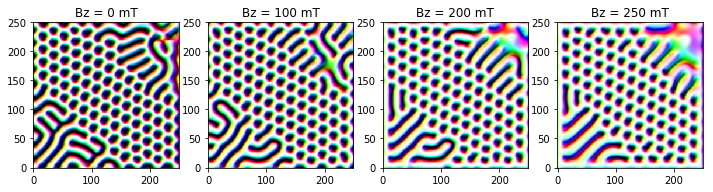

In [31]:
f, axs = plt.subplots(nrows=1, ncols=4, figsize=(12, 16))

for idx, i in enumerate([0, 100, 200, 250]):
    ax = axs.flatten()[idx]
    ax.imshow(hsl_maps[idx], origin='lower', vmin=-1, vmax=1, cmap='RdYlBu')
    ax.set_title('Bz = {} mT'.format(i))

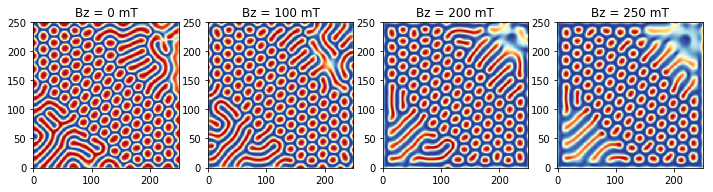

In [32]:
f, axs = plt.subplots(nrows=1, ncols=4, figsize=(12, 16))

for idx, i in enumerate([0, 100, 200, 250]):
    ax = axs.flatten()[idx]
    ax.imshow(z_maps[idx], origin='lower', vmin=-1, vmax=1, cmap='RdYlBu')
    ax.set_title('Bz = {} mT'.format(i))

In [16]:
bw_maps = []

for i, omf in enumerate(omfs): 

    data = op.MagnetisationData(omfs[i])
    data.generate_coordinates()
    data.generate_field()
    
    av_map = np.zeros((len(data.xs), len(data.ys)))
    for j, z in enumerate(data.zs):
        fltr = data.z == data.zs[j]
        av_map += data.field_z[fltr].reshape(len(data.xs), -1)
    av_map /= len(data.zs)
        
    bw_maps.append(np.copy(av_map))

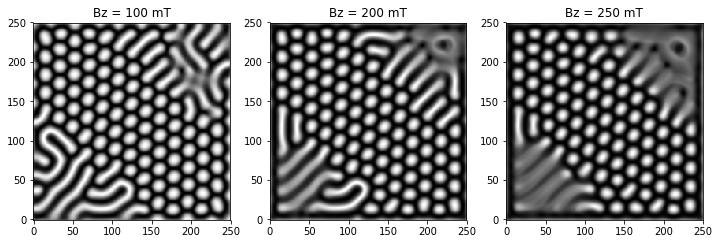

In [18]:
f, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 12))

for idx, i in enumerate([100, 200, 250]):
    ax = axs.flatten()[idx]
    ax.imshow(bw_maps[idx], origin='lower', vmin=-1, vmax=1, cmap='binary')
    ax.set_title('Bz = {} mT'.format(i))